####  STATISTICAL TECHNIQUES FOR NOISY DATA
---

##### 1. Libraries set up 


In [68]:
# Libraries

# Standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os 

# Import matplotlib for visualization
import matplotlib
import matplotlib.pyplot as plt
# Plot settings
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [8.0, 4.0]
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['lines.linewidth'] = 2.0

# ML libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### 2. Data
2.1 Data Loading

In [69]:
X_train = pd.read_csv("./data et benchmark/x_train_Lafd4AH.csv", index_col='ID')
X_test = pd.read_csv("./data et benchmark/x_test_c7ETL4q.csv", index_col='ID')
y_train = pd.read_csv("./data et benchmark/y_train_JQU4vbI.csv", index_col='ID')

X_train.head()

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,...,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20
ID,,,,,,,,,,,,,,,,,,,,,
0,0,2,18,5,3,44,-0.015748,0.147931,-0.015504,0.179183,...,0.059459,0.630899,0.003254,-0.379412,0.008752,-0.110597,-0.012959,0.174521,-0.002155,-0.000937
1,0,3,43,15,6,104,0.003984,NaN,-0.090580,NaN,...,0.015413,NaN,0.003774,NaN,-0.018518,NaN,-0.028777,NaN,-0.034722,NaN
2,0,4,57,20,8,142,0.000440,-0.096282,-0.058896,0.084771,...,0.008964,-0.010336,-0.017612,-0.354333,-0.006562,-0.519391,-0.012101,-0.356157,-0.006867,-0.308868
3,0,8,1,1,1,2,0.031298,-0.429540,0.007756,-0.089919,...,-0.031769,0.012105,0.033824,-0.290178,-0.001468,-0.663834,-0.013520,-0.562126,-0.036745,-0.631458
4,0,14,36,12,5,92,0.027273,-0.847155,-0.039302,-0.943033,...,-0.038461,-0.277083,-0.012659,0.139086,0.004237,-0.017547,0.004256,0.579510,-0.040817,0.802806


In [70]:
y_train.head()

,RET
ID,
0,True
1,True
2,False
3,False
4,False


We have correctly import our datasets. So now let analyse it.

2.2 Data Analysis and Exploratory

In [71]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418595 entries, 0 to 418594
Data columns (total 46 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            418595 non-null  int64  
 1   STOCK           418595 non-null  int64  
 2   INDUSTRY        418595 non-null  int64  
 3   INDUSTRY_GROUP  418595 non-null  int64  
 4   SECTOR          418595 non-null  int64  
 5   SUB_INDUSTRY    418595 non-null  int64  
 6   RET_1           416236 non-null  float64
 7   VOLUME_1        353570 non-null  float64
 8   RET_2           416130 non-null  float64
 9   VOLUME_2        352209 non-null  float64
 10  RET_3           416088 non-null  float64
 11  VOLUME_3        350776 non-null  float64
 12  RET_4           416051 non-null  float64
 13  VOLUME_4        347598 non-null  float64
 14  RET_5           416011 non-null  float64
 15  VOLUME_5        343902 non-null  float64
 16  RET_6           415998 non-null  float64
 17  VOLUME_6       

Our datasets has 46 features and 418595 rows. All features are numbers and some features contains nan values. We will investigate this deeply later soon.

In [72]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418595 entries, 0 to 418594
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   RET     418595 non-null  bool 
dtypes: bool(1)
memory usage: 3.6 MB


Our target is a boolean

Now let investigate NAN values in our dataset

NAN Values

In [73]:
X_train.isna().sum()

DATE                  0
STOCK                 0
INDUSTRY              0
INDUSTRY_GROUP        0
SECTOR                0
SUB_INDUSTRY          0
RET_1              2359
VOLUME_1          65025
RET_2              2465
VOLUME_2          66386
RET_3              2507
VOLUME_3          67819
RET_4              2544
VOLUME_4          70997
RET_5              2584
VOLUME_5          74693
RET_6              2597
VOLUME_6          74714
RET_7              2585
VOLUME_7          73853
RET_8              2623
VOLUME_8          73898
RET_9              2682
VOLUME_9          73298
RET_10             2692
VOLUME_10         73305
RET_11             2961
VOLUME_11         72025
RET_12             3186
VOLUME_12         62523
RET_13             3360
VOLUME_13         59008
RET_14             4413
VOLUME_14         60929
RET_15             4990
VOLUME_15         66373
RET_16             5280
VOLUME_16         67262
RET_17             5301
VOLUME_17         62314
RET_18             5307
VOLUME_18       

In [18]:
round(X_train.isna().sum()/len(X_train)*100,1)

DATE               0.0
STOCK              0.0
INDUSTRY           0.0
INDUSTRY_GROUP     0.0
SECTOR             0.0
SUB_INDUSTRY       0.0
RET_1              0.6
VOLUME_1          15.5
RET_2              0.6
VOLUME_2          15.9
RET_3              0.6
VOLUME_3          16.2
RET_4              0.6
VOLUME_4          17.0
RET_5              0.6
VOLUME_5          17.8
RET_6              0.6
VOLUME_6          17.8
RET_7              0.6
VOLUME_7          17.6
RET_8              0.6
VOLUME_8          17.7
RET_9              0.6
VOLUME_9          17.5
RET_10             0.6
VOLUME_10         17.5
RET_11             0.7
VOLUME_11         17.2
RET_12             0.8
VOLUME_12         14.9
RET_13             0.8
VOLUME_13         14.1
RET_14             1.1
VOLUME_14         14.6
RET_15             1.2
VOLUME_15         15.9
RET_16             1.3
VOLUME_16         16.1
RET_17             1.3
VOLUME_17         14.9
RET_18             1.3
VOLUME_18         16.1
RET_19             1.3
VOLUME_19  

There is a non negligible amount of NaN values throughout the dataset, counting for nearly 15% of the VOLUME columns and 1% of the RET columns. These values can't be dropped, meaning that we will need to find a way to treat with these values later on.


For Volume features: As we use relative volumes,and because relative volumes are computed using the median. The way the median function is implemented in python could cause the apparition of many NaN values. 
Indeed,in python,  if we compute the relative volume over a period of 20 days and there is one NaN value at a day D, the relative volume will show NaN values from day D to day D+20.


For RET features: NaN values in the RET columns can come from the nature of the stock market data. Indeed, the market closes on some days (weekends, public holidays, etc). This remark  could also be  apply to the relative volume, and contribute to the high amount of NaN values on it.

Let now check how this NANs are distributed through different category of SECTOR, INDUSTRY,... 

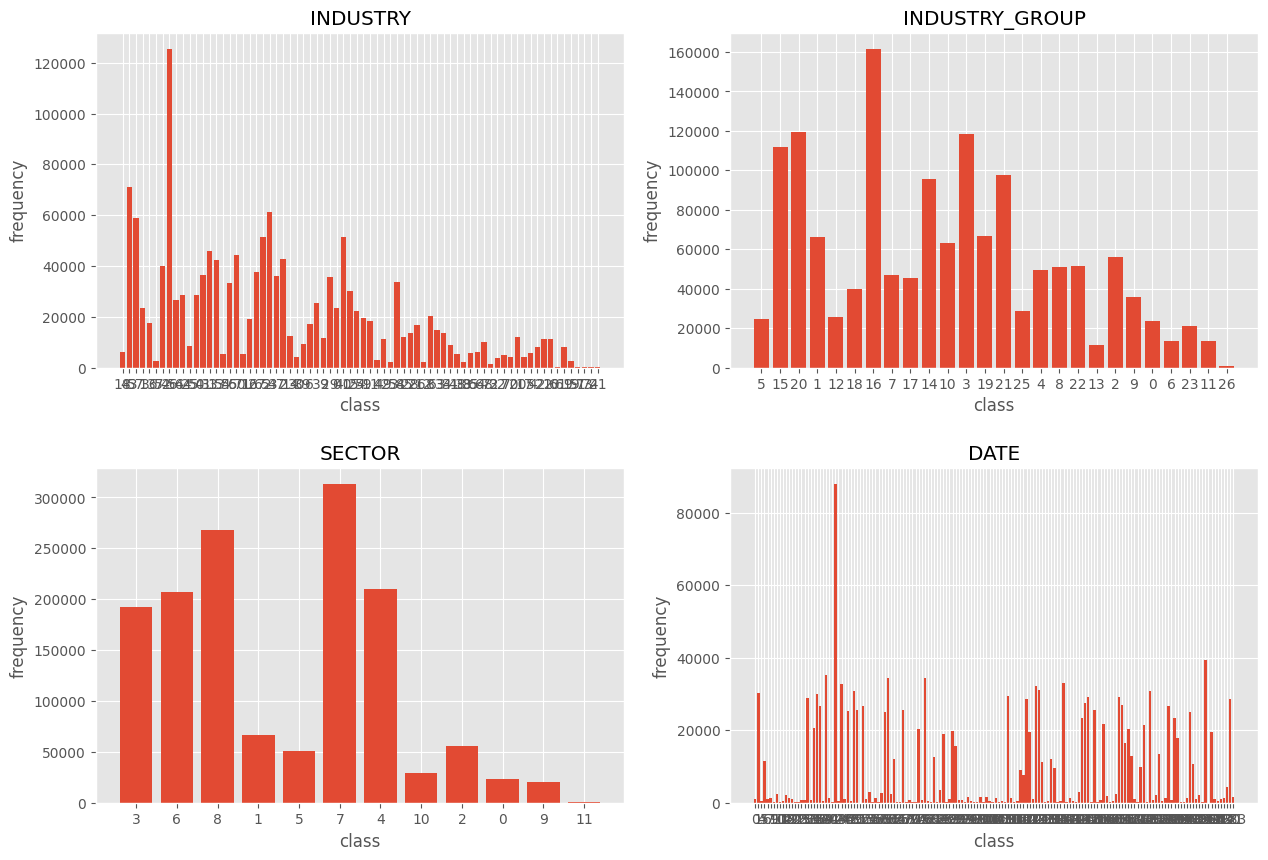

In [74]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.3)

for i, col in zip(range(1, 5), ['INDUSTRY', 'INDUSTRY_GROUP', 'SECTOR', 'DATE']):
    plt.subplot(2, 2, i)
    dic = {}
    for k in X_train[col].unique():
        dic[k] = sum(X_train[X_train[col] == k].isna().sum())
    plt.bar(range(len(dic)), list(dic.values()), align='center')
    plt.xticks(range(len(dic)), list(dic.keys()))
    plt.xlabel('class')
    plt.ylabel('frequency')
    plt.title(col)

plt.show()

Conclusion: We notice that the amount of NaN per category is very variable, which shows that some industries / groups are more prone to seeing NaN values than others.

However, some days seem to have a higher amount of NaN values than others. This might be because of longer public holidays where the market closes.

Let Analyze now our target. We start by binarize it first before checking if it is balanced.

In [75]:
y_train.RET = y_train.RET.astype(int)

In [76]:
round(y_train.RET.value_counts(normalize = True)*100,1)

RET
0    50.1
1    49.9
Name: proportion, dtype: float64

<Axes: xlabel='RET'>

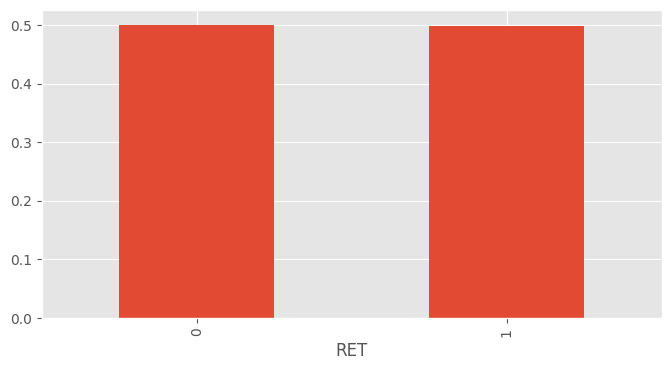

In [26]:
y_train.RET.value_counts(normalize = True).plot(kind= 'bar')

The target output seems balanced. We can therefore afford to use a conventional approach to the problem, putting inbalance-related issues aside.

Statistics

In [77]:
X_train.describe()

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,...,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20
count,418595.000000,418595.000000,418595.000000,418595.000000,418595.000000,418595.000000,416236.000000,353570.000000,416130.000000,352209.000000,...,413315.000000,351333.000000,413294.000000,356281.000000,413288.000000,351009.000000,413282.000000,351266.000000,413254.000000,350738.000000
mean,108.659002,3373.567833,37.176020,12.697959,5.483845,90.391663,0.001383,-0.071502,0.000973,-0.075230,...,0.001074,-0.076018,0.001642,-0.087854,0.001131,-0.076147,-0.000798,-0.076496,-0.000027,-0.076337
std,61.891642,1533.157749,19.706505,7.231701,2.410113,47.491157,0.031311,3.038658,0.030987,2.635549,...,0.029538,2.185741,0.031914,2.094459,0.031435,2.423121,0.030738,2.229668,0.033347,2.721355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.845324,-2.434414,-0.770751,-3.007262,...,-0.765478,-5.600056,-0.825014,-4.610393,-0.876157,-4.167784,-0.880000,-2.341887,-0.785714,-2.768928
25%,56.000000,2478.000000,22.000000,6.000000,4.000000,49.000000,-0.010970,-0.555394,-0.011312,-0.540629,...,-0.010527,-0.533574,-0.011331,-0.552613,-0.010949,-0.539491,-0.012139,-0.527846,-0.011682,-0.542790
50%,104.000000,3560.000000,43.000000,15.000000,6.000000,104.000000,0.000637,-0.282609,0.000401,-0.278437,...,0.000530,-0.272271,0.000433,-0.285480,0.000000,-0.281753,0.000000,-0.277674,0.000000,-0.283405
75%,161.000000,4606.000000,53.000000,19.000000,7.000000,128.000000,0.012950,0.047759,0.012326,0.041177,...,0.012084,0.029131,0.012862,0.027272,0.012180,0.027639,0.011236,0.030201,0.011712,0.035795
max,223.000000,5716.000000,74.000000,26.000000,11.000000,182.000000,1.444990,1232.174009,1.427746,632.268279,...,1.028902,355.613431,1.707736,408.771698,6.000004,788.461460,2.954430,631.249564,7.208859,932.939205


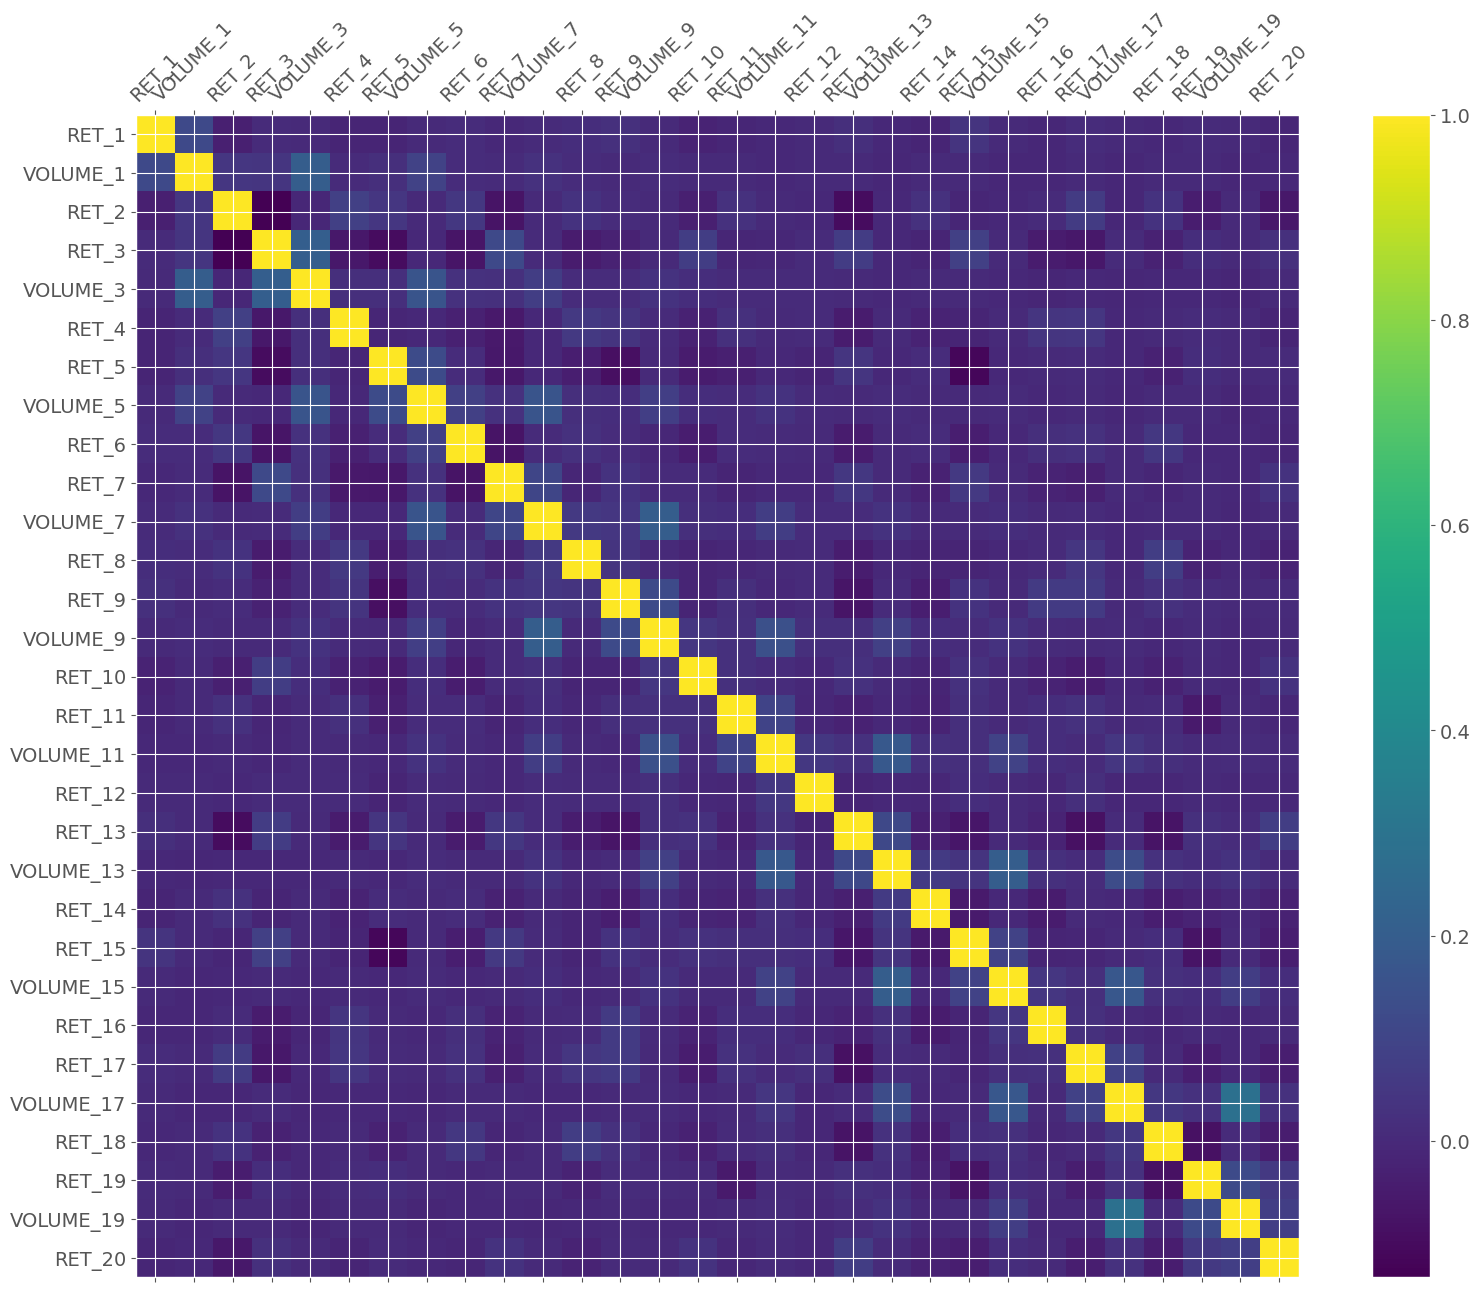

In [78]:
to_drop = ['DATE', 'STOCK', 'INDUSTRY', 'INDUSTRY_GROUP', 'SECTOR','SUB_INDUSTRY']

for col in ['VOLUME_' + str(i) for i in range(2, 21, 2)]:
    to_drop += [col]

fig = plt.figure(figsize = (19, 15))
plt.matshow(X_train.drop(to_drop, axis = 1).corr(), fignum = fig.number)
plt.xticks(range(X_train.drop(to_drop, axis = 1).shape[1]), X_train.drop(to_drop, axis = 1).columns, fontsize = 14, rotation = 45)
plt.yticks(range(X_train.drop(to_drop, axis = 1).shape[1]), X_train.drop(to_drop, axis = 1).columns, fontsize = 14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.show()

Conclusion: There seem to be no outlier or surprising values. We can therefore assume that apart from the NaN issue, the dataset requires minimum cleaning. 
Moreover, all the features seem to be linearly uncorrelated, so no conclusion can be made at this point.

##### 3. Data Cleaning and Models


       3.1 Preprocessing

       The main drawback in this challenge would be to deal with the noise. To do that, we could create some feature that aggregate features with some statistics.

       To deal with this, we will create new categorical features derived from statistics on a specific target, conditionally based on certain features.
      So, to create these new features and select the features to include in the model, we will create classes that inherit from `BaseEstimator` and `TransformerMixin`of sklearn , and we will chain these operations in a `Pipeline`.

      If we consider that  a  week = 5 days, the class Features_engineering creates features summarizing the mean,the median and the standard deviation  of RET_1, RET_5, RET_11, RET_15, RET_20 conditionally based on SECTOR and DATE, and the mean,the median and the standard deviation  of VOLUME_1, VOLUME_5, VOLUME_11, VOLUME_15, VOLUME_20 conditionally based on STOCK and INDUSTRY

The `Features_selection` class selects the features to retain in the model. We have created a predefined list of features, including all the new features and the features `RET_1` to `RET_20`, `VOLUME_1` to `VOLUME_20`

In [ ]:
# Liste de features à utiliser


##### 3.2 Pipelines Implementation and Models choice

    

 We will create 5 different models:

1. Default feature creation, selection of predefined features, filling missing values with 0, value normalization, random forest
2. Default feature creation, selection of predefined features, filling missing values with the mean, value normalization, random forest
3. Default feature creation, selection of predefined features, filling missing values with 0, value normalization, gradient boosting
4. Default feature creation, selection of predefined features, filling missing values with the mean, value normalization, gradient boosting
5. Feature creation using another method, feature selection by a list of features, filling missing values with the mean, value normalization, random forest

We have chosen boosting and bagging methods.

We will also perform stratified cross-validation to get a better insight into the results. Stratification ensures that we do not have different proportions of 1s and 0s in the training and test sets, which could bias the results.

For the random forest, we choose a large number of shallow trees to avoid overfiting."

In [88]:
class Features_engi1(BaseEstimator, TransformerMixin):
    
    def __init__(self, shifts = [1, 5, 11, 15, 20], statistics = ['median'], target_feature = ['RET'], gb_features = ['SECTOR','DATE','STOCK']):
        self.shifts = shifts # pour réduire le bruit, on peut ne pas tous les prendre
        self.statistics = statistics # type de statistique 
        self.target_feature = target_feature 
        self.gb_features = gb_features
        self.tmp_name = str()
        self.new_features = []
        
        
    def fit(self, X, y=None):  
        self.tmp_name = '_'.join(self.gb_features)
        return self
        
    def transform(self, X, y=None):
        #X_ = pd.DataFrame(X).copy()
        for shift in self.shifts:
            for stat in self.statistics:
                for target in self.target_feature :
                    name = f'{target}_{shift}_{self.tmp_name}_{stat}'
                    feat = f'{target}_{shift}'
                    self.new_features.append(name)
                    X[name] = X.groupby(self.gb_features)[feat].transform(stat)
        features = list(X.columns)
        features += self.new_features  # on ajoute les features conditionnelles
        X_ = X[features].copy()
        X_ = X_.loc[:,~X_.columns.duplicated()] #au cas où on a des duplicats
        X_[X_==np.inf]=np.nan #pour gérer les valeurs infinies avec l'imputer 
        return X_

In [100]:

                
    
        my_features = list(X.columns)
        my_features += self.new_features  # on ajoute les features conditionnelles
        X_ =class feature_engi2(BaseEstimator, TransformerMixin):
    
    def __init__(self, statistics=['mean','std'],target_feature=['RET','VOLUME'],weeks=4, day_per_week=5 ):
        self.statistics= statistics
        self.target_feature = target_feature 
        self.weeks=weeks
        self.day_per_week= day_per_week
        self.tmp_name = str()
        self.new_features = []
        
    def fit(self, X, y=None):
        
        for statistic in self.statistics:
            if statistic == 'mean':
               self.tmp_name ='AVG_WEEK'
               
            elif statistic == 'std':
                self.tmp_name = 'STD_WEEK'
            
        return self
    
    def transform(self, X, y=None):
        or week in range(self.weeks):
            for stat in self.statistics:
                for target in self.target_feature:
                    features = [f'{target}_{day}' for day in range(1, self.day_per_week + 1)]
                    name = f'{target}_{self.tmp_name}_{week + 1}'
                    self.new_features.append(name)
                    if stat == 'mean':
                        X[name] = X[features].mean(axis=1)
                    elif stat == 'std':
                        X[name] = X[features].std(axis=1)
        
        my_features = list(X.columns)
        my_features += self.new_features
        X_ = X[my_features].copy()
        X_ = X_.loc[:, ~X_.columns.duplicated()]
        X_[X_ == np.inf] = np.nan
        return X_


    

In [101]:
feature_engineer = feature_engi2()
feature_engineer.fit(X_train)
transformed_df = feature_engineer.transform(X_train)

transformed_df.head()

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,...,RET_STD_WEEK_16,RET_STD_WEEK_17,RET_STD_WEEK_18,RET_STD_WEEK_19,RET_STD_WEEK_20,VOLUME_STD_WEEK_16,VOLUME_STD_WEEK_17,VOLUME_STD_WEEK_18,VOLUME_STD_WEEK_19,VOLUME_STD_WEEK_20
ID,,,,,,,,,,,,,,,,,,,,,
0,0,2,18,5,3,44,-0.015748,0.147931,-0.015504,0.179183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,3,43,15,6,104,0.003984,NaN,-0.090580,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,4,57,20,8,142,0.000440,-0.096282,-0.058896,0.084771,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,8,1,1,1,2,0.031298,-0.429540,0.007756,-0.089919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,14,36,12,5,92,0.027273,-0.847155,-0.039302,-0.943033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
